<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [3]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 104.6 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 127.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 144.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 159.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-linux_x86_64.whl size=303803 sha256=66c57a9f3fee0e51b226d047ce5694c8d892f0491a4575830ed0161ad519e842
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [7]:
import yfinance as yf

# Create a Ticker object for Tesla
tsla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [8]:
tsla_info = tsla.info
print(tsla_info)

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

In [9]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Get historical stock data
gme_data = gme.history(period="max")

# Reset the index to make Date a column
gme_data.reset_index(inplace=True)

# Display the first five rows
print("✅ GameStop (GME) Stock Data:")
print(gme_data.head())

✅ GameStop (GME) Stock Data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [26]:
tsla_history = tsla.history(period="max")
print(tsla_history.head())  # Display first 5 rows

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [33]:
!pip install yfinance
!pip install requests
!pip install bs4

In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define Tesla revenue webpage URL from Coursera
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Try fetching the webpage content
try:
    response = requests.get(url)

    if response.status_code == 200:
        html_data = response.text
        soup = BeautifulSoup(html_data, "html.parser")

        # Find the first table
        table = soup.find("table")

        if table:
            # Extract table rows
            data = []
            for row in table.find_all("tr"):
                cols = row.find_all("td")
                cols = [col.text.strip() for col in cols]  # Clean text
                if cols:  
                    data.append(cols)

            # Create DataFrame
            tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

            # Clean the Revenue column
            tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', "", regex=True)
            tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
            tesla_revenue = tesla_revenue.dropna(subset=["Revenue"])

            print("✅ Tesla Revenue Data (Extracted via Web Scraping):")
            print(tesla_revenue.tail())  # Display last 5 rows

        else:
            print("❌ No table found on the webpage.")

    else:
        print(f"❌ Failed to fetch webpage. Status Code: {response.status_code}")

except Exception as e:
    print("❌ Error occurred during web scraping:", str(e))

✅ Tesla Revenue Data (Extracted via Web Scraping):
    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


In [35]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Get Tesla's quarterly revenue data
tesla_revenue = tesla.quarterly_income_stmt.loc["Total Revenue"]

# Convert to a DataFrame
tesla_revenue_df = tesla_revenue.reset_index()
tesla_revenue_df.columns = ["Date", "Revenue"]

# Display last 5 rows
print("✅ Tesla Revenue Data (Extracted via yfinance):")
print(tesla_revenue_df.tail())

✅ Tesla Revenue Data (Extracted via yfinance):
        Date        Revenue
2 2024-06-30  25500000000.0
3 2024-03-31  21301000000.0
4 2023-12-31  25167000000.0
5 2023-09-30            NaN
6 2023-06-30            NaN


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [31]:
from bs4 import BeautifulSoup
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"

# Send request to get the webpage content
response = requests.get(url)

# Save the HTML content
html_data = response.text

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [10]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Get historical stock data
gme_data = gme.history(period="max")

# Reset the index to make Date a column
gme_data.reset_index(inplace=True)

# Display the first five rows
print("✅ GameStop (GME) Stock Data:")
print(gme_data.head())

✅ GameStop (GME) Stock Data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [11]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Get GameStop's quarterly revenue data
gme_revenue = gme.quarterly_income_stmt.loc["Total Revenue"]

# Convert to a DataFrame
gme_revenue_df = gme_revenue.reset_index()
gme_revenue_df.columns = ["Date", "Revenue"]

# Display the last 5 rows of GameStop revenue data
print("✅ GameStop (GME) Revenue Data:")
print(gme_revenue_df.tail())

✅ GameStop (GME) Revenue Data:
        Date       Revenue
1 2024-07-31   798300000.0
2 2024-04-30           NaN
3 2024-01-31  1793600000.0
4 2023-10-31  1078300000.0
5 2023-07-31  1163800000.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [16]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Get GameStop's quarterly revenue data
gme_revenue = gme.quarterly_income_stmt.loc["Total Revenue"]

# Convert to a DataFrame
gme_revenue_df = gme_revenue.reset_index()
gme_revenue_df.columns = ["Date", "Revenue"]

# Display the last 5 rows of GameStop revenue data
print("✅ GameStop (GME) Revenue Data:")
print(gme_revenue_df.tail())

✅ GameStop (GME) Revenue Data:
        Date       Revenue
1 2024-07-31   798300000.0
2 2024-04-30           NaN
3 2024-01-31  1793600000.0
4 2023-10-31  1078300000.0
5 2023-07-31  1163800000.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


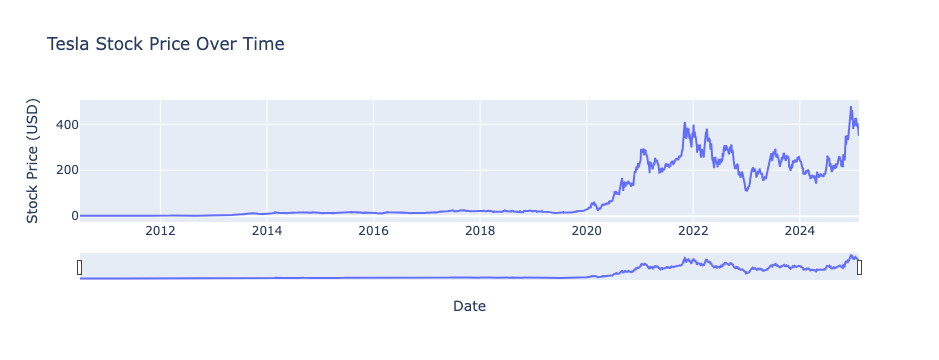

In [15]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Create a Ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Get Tesla's historical stock data
tesla_data = tesla.history(period="max")

# Reset the index to ensure Date is a column
tesla_data.reset_index(inplace=True)

# Define a function to plot the stock graph
def make_graph(stock_data, title):
    fig = go.Figure()

    # Add trace for stock closing prices
    fig.add_trace(go.Scatter(x=stock_data["Date"], y=stock_data["Close"], mode="lines", name="Closing Price"))

    # Set graph title and axis labels
    fig.update_layout(title=title, xaxis_title="Date", yaxis_title="Stock Price (USD)", xaxis_rangeslider_visible=True)

    # Show the figure
    fig.show()

# Plot Tesla stock graph
make_graph(tesla_data, "Tesla Stock Price Over Time")

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


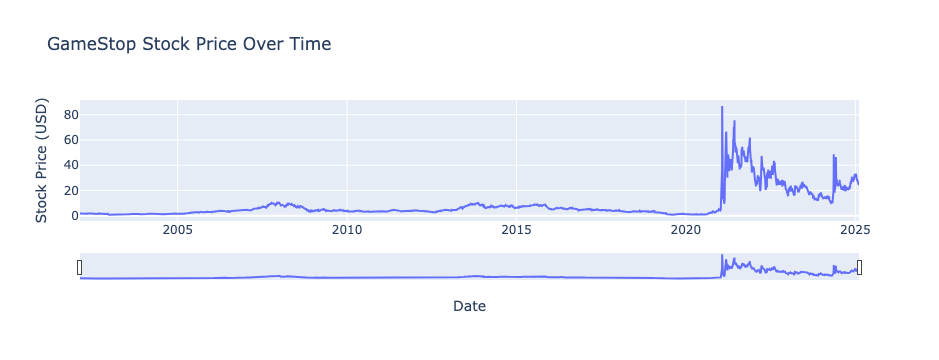

In [14]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Create a Ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Get GameStop's historical stock data
gme_data = gme.history(period="max")

# Reset the index to ensure Date is a column
gme_data.reset_index(inplace=True)

# Define a function to plot the stock graph
def make_graph(stock_data, title):
    fig = go.Figure()

    # Add trace for stock closing prices
    fig.add_trace(go.Scatter(x=stock_data["Date"], y=stock_data["Close"], mode="lines", name="Closing Price"))

    # Set graph title and axis labels
    fig.update_layout(title=title, xaxis_title="Date", yaxis_title="Stock Price (USD)", xaxis_rangeslider_visible=True)

    # Show the figure
    fig.show()

# Plot GameStop stock graph
make_graph(gme_data, "GameStop Stock Price Over Time")

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
